
#### Quantum State Tomography
Quantum state tomography is a fundamental technique in quantum computing and quantum information science. It enables the reconstruction of a quantum system's state from measurement outcomes, crucial for verifying and validating quantum states—the building blocks of quantum algorithms and protocols.

In quantum mechanics, a quantum system's state is represented by a density matrix. This matrix holds all probabilistic information about the system, allowing predictions of measurement outcomes. For an 𝑛-qubit system, the density matrix is a 2^n ×2^n complex matrix, fully describing the quantum state.

The process begins with repeatedly preparing the quantum state to ensure consistency and accuracy. Next, measurements are performed in various bases by applying quantum gates to rotate the state, each basis providing a distinct perspective. Repeated measurements gather statistical data, recording the frequency of outcomes to interpret empirical probabilities. This data is then used to estimate the density matrix, often through optimization techniques like maximum likelihood estimation or linear inversion.

Choosing appropriate measurement bases is crucial, commonly including the computational basis and those derived from Hadamard, Pauli-X, Pauli-Y, and Pauli-Z gates. Managing noise and imperfections is a significant challenge, addressed through advanced statistical methods and regularization techniques. The complexity of tomography grows exponentially with the number of qubits, making full tomography impractical for large systems. Alternatives such as compressed sensing or machine learning-based approaches are explored for scalability.

Quantum state tomography is indispensable for quantum professionals, enabling precise characterization of quantum states. It is vital for verifying the integrity of quantum states and ensuring the proper functioning of quantum algorithms and protocols. As quantum technologies evolve, efficient and accurate tomography will remain a cornerstone, driving advancements in this field.

###### Mathematical Formulation
For a single qubit, the density matrix 𝜌 can be written as:

$$
\rho = \frac{1}{2}(I + \vec{r} \cdot \vec{\sigma})
$$

\begin{align*}
\text{where:} \\
&\rho: \text{density matrix} \\
&I: \text{identity matrix} \\
&\vec{r}: \text{Bloch vector} \\
&\vec{\sigma}: \text{Pauli vector}
\end{align*}

$$
r_i = \langle \sigma_i \rangle = Tr(\rho \sigma_i)
$$

\begin{align*}
\text{where:} \\
&r_i: \text{i-th component of the Bloch vector} \\
&\langle \sigma_i \rangle: \text{expectation value of } \sigma_i \\
&Tr: \text{trace operation}
\end{align*}


In [5]:
# Import libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, circuit_drawer
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit.result import Counts
from qiskit.quantum_info import DensityMatrix
from qiskit_aer import AerSimulator

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [6]:
# Function to prepare a quantum state
def prepare_state():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.s(0)
    return qc

In [8]:
# Function to perform measurements in different bases
def measure_in_bases(circuit):
    circuits = []
    
    # Measure in X basis
    qc_x = circuit.copy()
    qc_x.h(0)
    qc_x.measure_all()
    circuits.append(qc_x)
    
    # Measure in Y basis
    qc_y = circuit.copy()
    qc_y.sdg(0)
    qc_y.h(0)
    qc_y.measure_all()
    circuits.append(qc_y)
    
    # Measure in Z basis
    qc_z = circuit.copy()
    qc_z.measure_all()
    circuits.append(qc_z)
    
    return circuits

In [9]:
# Prepare the quantum state
qc = prepare_state()

Original Circuit:


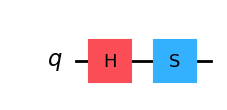

In [10]:
# Draw the original circuit
print("Original Circuit:")
circuit_drawer(qc, output='mpl')
plt.show()

In [11]:
# Transpile the circuit for the AerSimulator
transpiled_qc = transpile(qc, backend=AerSimulator())

Transpiled Circuit:


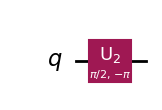

In [12]:
# Draw the transpiled circuit
print("Transpiled Circuit:")
circuit_drawer(transpiled_qc, output='mpl')
plt.show()

In [13]:
# Generate measurement circuits
measurement_circuits = measure_in_bases(qc)

In [14]:
# Use AerSimulator from qiskit_aer
simulator = AerSimulator()

In [15]:
# Run the circuits
results = simulator.run(measurement_circuits).result()

In [16]:
# Extract counts
counts_x = results.get_counts(measurement_circuits[0])
counts_y = results.get_counts(measurement_circuits[1])
counts_z = results.get_counts(measurement_circuits[2])

In [17]:
# Function to calculate expectation values from counts
def expectation_value(counts):
    shots = sum(counts.values())
    exp_value = 0
    if '0' in counts:
        exp_value += counts['0'] / shots
    if '1' in counts:
        exp_value -= counts['1'] / shots
    return exp_value

In [18]:
# Calculate Bloch vector components
r_x = expectation_value(counts_x)
r_y = expectation_value(counts_y)
r_z = expectation_value(counts_z)

In [19]:
# Reconstruct the density matrix
rho = 0.5 * (np.eye(2) + r_x * np.array([[0, 1], [1, 0]]) + r_y * np.array([[0, -1j], [1j, 0]]) + r_z * np.array([[1, 0], [0, -1]]))

In [20]:
# Print the density matrix
print("Reconstructed Density Matrix:")
print(rho)

Reconstructed Density Matrix:
[[0.55273438+0.j         0.05273438-0.05273438j]
 [0.05273438+0.05273438j 0.44726562+0.j        ]]


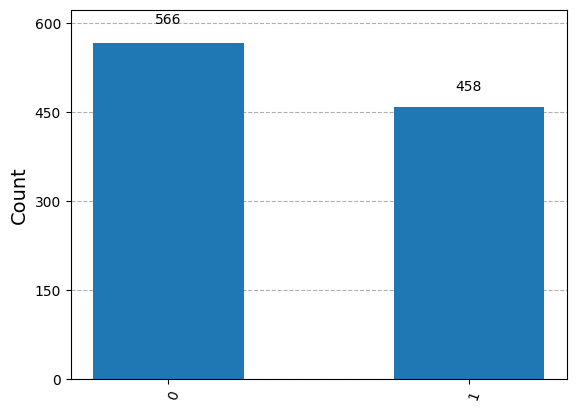

In [23]:
# Plot the histogram of one of the measurement results
plot_histogram(counts_z)
plt.show()